In [142]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [396]:
# Command to use the full widht of the screen
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }/style>"))

# Small test to run:
git push origin master

In [416]:
def BACN(init_nodes, final_nodes, m_param, l_param=0, CN=False, DIR=False):###, new_edges_only_on_new_nodes=False):
    assert init_nodes > 1
    assert init_nodes < final_nodes
    assert init_nodes >= m_param
    assert l_param >= 0
    start = time.time()
    A = np.zeros((final_nodes, final_nodes)) 
    for i in range(init_nodes):
        for j in range(i+1, init_nodes):
            A[i,j] = 1
            A[j,i] = 1
    for i in range(init_nodes, final_nodes):
        print("\n", i)
        if DIR:
            print("A[:i,:]")
            print(A[:i,:])
            p_deg_source = np.sum(A[:i,:], axis=1)
            print("p_deg_source", p_deg_source)
            p_deg_source /= np.sum(p_deg_source)
            print("p_deg_source", p_deg_source)
            rand_source = np.random.choice(i, size=m_param, p=p_deg_source, replace=False)
            print("rand_source", rand_source)
            A[rand_source, i] = 1
            p_deg_target = np.sum(A[:,:i], axis=0)
            p_deg_target /= np.sum(p_deg_target)
            print("p_deg_target", p_deg_target)
            rand_target = np.random.choice(i, size=m_param, p=p_deg_target, replace=False)
            print("rand_target", rand_target)
            A[i, rand_target] = 1
        else:
            p_deg = np.sum(A, axis=1)[:i]
            p_deg /= np.sum(p_deg)
            rand_node = np.random.choice(i, size=m_param, p=p_deg, replace=False)
            A[i, rand_node] = A[rand_node, i] = 1
        #print("\nA")
        #print(A)
        if CN and l_param > 0:
            S = A[:i+1,:i+1]
            #print("First S")
            #print(S)
            cn_mat = S @ S
            #print("cn_mat")
            #print(cn_mat)
            S[np.eye(S.shape[0], dtype=bool)] = -1
            #print("Second S")
            #print(S)
            missing = np.nonzero(S==0)
            #print("missing:", missing)
            if DIR==False:
                missing = (missing[0][missing[0]<missing[1]], missing[1][missing[0]<missing[1]]) #only upper triangle of adjacency matrix
                #print("missing", missing)
            ###if new_edges_only_on_new_nodes:
            ###    missing = (missing[0][missing[0]>=i], missing[1][missing[0]>=i])
            ###    print("missing", missing)
            if missing[0].size != 0:
                p_cn = cn_mat[missing]
                p_cn /= np.sum(p_cn)
                #print("p_cn", p_cn)
                #print(np.unique(p_cn))
                if np.isnan(p_cn).all():
                    if l_param < missing[0].size:
                        #print("if")
                        rand_edge = np.random.choice(missing[0].size, size=l_param, replace=False)
                    else:
                        #print("else")
                        rand_edge = range(missing[0].size)
                else:
                    if l_param > np.count_nonzero(p_cn):
                        #print("IF")
                        rand_edge = np.random.choice(missing[0].size, size=np.count_nonzero(p_cn), p=p_cn, replace=False)
                    else:
                        #print("ELSE")
                        rand_edge = np.random.choice(missing[0].size, size=l_param, p=p_cn, replace=False)
                #print("rand_edge", rand_edge)
                a = missing[0][rand_edge]
                #print("a", a)
                b = missing[1][rand_edge]
                #print("b", b)
                if DIR:
                    A[a,b] =  1
                else:
                    A[a,b] = A[b,a] = 1
                #print("A")
                #print(A)
            S[np.eye(S.shape[0], dtype=bool)] = 0
            #print("Fourth S")
            #print(S)
    end = time.time()
    #print('Elapsed time:', end - start, 'seconds')
    return A

In [418]:
testBACN = BACN(3,6,1,0,CN=False,DIR=True)
testBACN


 3
A[:i,:]
[[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]]
p_deg_source [2. 2. 2.]
p_deg_source [0.33333333 0.33333333 0.33333333]
rand_source [1]
p_deg_target [0.33333333 0.33333333 0.33333333]
rand_target [2]

 4
A[:i,:]
[[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
p_deg_source [2. 3. 2. 1.]
p_deg_source [0.25  0.375 0.25  0.125]
rand_source [0]
p_deg_target [0.25  0.25  0.375 0.125]
rand_target [3]

 5
A[:i,:]
[[0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
p_deg_source [3. 3. 2. 1. 1.]
p_deg_source [0.3 0.3 0.2 0.1 0.1]
rand_source [3]
p_deg_target [0.2 0.2 0.3 0.2 0.1]
rand_target [0]


array([[0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [238]:
len(np.nonzero(testBACN)[0])

48

In [202]:
def cns_number(x, links):
    c_m = x@x
    cn = c_m[links[:,0], links[:,1]]
    return cn

In [213]:
#cns_number(testBACN, np.array([[0,0], [0,1], [0,2]]))

In [236]:
def get_links_to_del(x, fraction=0.1, loops=1, DIR=False):
    if DIR:
        present = np.argwhere(x)
    else:
        present = np.argwhere(np.triu(x, 1) != 0)#== 1)
    num_to_del = int(present.shape[0] * fraction)
    idx_to_del = [np.random.choice(present.shape[0], size=num_to_del, replace=False) for i in range(loops)]
    links_to_del = np.array([present[idx] for idx in idx_to_del])
    return links_to_del

In [239]:
gltd = get_links_to_del(testBACN, DIR=False)
gltd

array([[[3, 7],
        [6, 9]]])

In [224]:
def delete_links(x, links_to_del, DIR=False):
    """Deletes the specified links from an adjacency matrix."""
    z = np.copy(x)
    for link in links_to_del:
        #print(link, link[0], link[1])
        if DIR:
            #print("if")
            z[link[0], link[1]] = 0
        else:
            #print("else")
            z[link[0], link[1]] = z[link[1], link[0]] = 0
    return z

In [225]:
#delete_links(testBACN, gltd[0])#, DIR=True)

In [226]:
#testBACN

In [227]:
def evaluate_predictions(true, pred, plot=False):
    precision, recall, _ = precision_recall_curve(true, pred)
    fpr, tpr, _ = roc_curve(true, pred)
    aupr = auc(recall, precision)
    auroc = auc(fpr, tpr)
    if plot:
        fig, ax = plt.subplots()
        ax.plot(recall, precision, 'go', label='Precision-Recall curve')
        ax.plot(fpr, tpr, '.', label='ROC curve')
        plt.legend()
        plt.show()
    return aupr, auroc

In [392]:
def cross_val_from_notebook(adjacency, links_to_del, loops=1, DIR=False, raw_output=True, verbose=False, plot=False):
    if raw_output:
        scores_list = []
        true_list = []
    else:
        results = np.zeros((loops, 2))
    for i in range(loops):
        print("cross_val_from_notebook: i LOOPS", i)
        if verbose:
            print('Trial {} of {}'.format(i+1, loops))
        print("adjacency")
        print(adjacency)
        x_ = delete_links(adjacency, links_to_del[i], DIR)
        print("x_")
        print(x_)
        missing = np.argwhere(x_ == 0)
        print("missing", missing)
        not_false = adjacency[missing[:,0], missing[:,1]]
        print("not_false", not_false)
        scores = cns_number(x_, missing)
        print("scores", scores)
        if raw_output:
            true_list.append(not_false)
            print("true_list", true_list)
            scores_list.append(scores)
            print("scores_list", scores_list)
        else:
            results[i] = evaluate_predictions(not_false, scores, plot=plot)
    if raw_output:
        return np.array(true_list).flatten(), np.asarray(scores_list).flatten()
    else:
        return results

In [393]:
def running_all_parameters(init_nodes, final_nodes, l, fraction=0.1, loops=1, CN=False, DIR=False):
    areas_under_curves = np.zeros((init_nodes+1, 2))
    for m in range(init_nodes+1):
        print("running_all_parameters*************************************m", m)
        start = time.time()
        B = BACN(init_nodes, final_nodes, m, l, CN, DIR)
        links_to_del = get_links_to_del(B, fraction, loops, DIR)
        r1 = cross_val_from_notebook(B, links_to_del, loops, DIR)
        #areas_under_curves[m,:] = np.mean(r1, axis=0)
        #end = time.time()

    return r1#areas_under_curves, B, links_to_del

In [235]:
np.array_equal(testBACN, testBACN.T)

True

In [394]:
def ploting_all_parameters(final, lmax, fraction, loops, CN, DIR):
    for i in range(2, final):
        #start = time.time()
        #plt.figure(figsize=(20,3))
        print("ploting_all_parameters_________________________________________________________________________________________________________i", i)
        for j in range(1, lmax+1):
            print("\nj:", j, running_all_parameters(i, final, j-1, fraction, loops, CN, DIR))
"""            r_p, b, ltd = running_all_parameters(i, final, j-1, fraction, loops, CN, DIR)
            
            #print(j, "\n", b, "\n", ltd)
            
            plt.subplot(1,lmax,j)
            plt.title("I:{}, f:{}\nCN:{}".format(i, final, j))
            plt.xlabel("m")
            plt.plot(r_p[:,0], 'bx--', label='AUPR')
            plt.plot(r_p[:,1], 'ro--', label='AUROC')
            #plt.legend()
        plt.show()
        #end = time.time()"""

'            r_p, b, ltd = running_all_parameters(i, final, j-1, fraction, loops, CN, DIR)\n            \n            #print(j, "\n", b, "\n", ltd)\n            \n            plt.subplot(1,lmax,j)\n            plt.title("I:{}, f:{}\nCN:{}".format(i, final, j))\n            plt.xlabel("m")\n            plt.plot(r_p[:,0], \'bx--\', label=\'AUPR\')\n            plt.plot(r_p[:,1], \'ro--\', label=\'AUROC\')\n            #plt.legend()\n        plt.show()\n        #end = time.time()'

In [395]:
ploting_all_parameters(final=6, lmax=3, fraction=0.1, loops=2, CN=True, DIR=False)

ploting_all_parameters_________________________________________________________________________________________________________i 2
running_all_parameters*************************************m 0
cross_val_from_notebook: i LOOPS 0
adjacency
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
x_
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
missing [[0 0]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [5 0]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]]
not_false [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
scores [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true_list [array([0., 0., 0., 

/home/jorge/anaconda2/envs/newenviroment/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide



scores_list [array([5., 4., 4., 4., 4., 5., 5., 5.]), array([4., 4., 5., 4., 4., 5., 5., 5.])]

j: 3 (array([0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]), array([5., 4., 4., 4., 4., 5., 5., 5., 4., 4., 5., 4., 4., 5., 5., 5.]))
ploting_all_parameters_________________________________________________________________________________________________________i 4
running_all_parameters*************************************m 0
cross_val_from_notebook: i LOOPS 0
adjacency
[[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
x_
[[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
missing [[0 0]
 [0 4]
 [0 5]
 [1 1]
 [1 4]
 [1 5]
 [2 2]
 [2 4]
 [2 5]
 [3 3]
 [3 4]
 [3 5]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [5 0]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]]
not_false [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

scores [3. 3. 1. 3. 3. 1. 5. 4. 1. 4. 1. 1. 1. 1. 1. 1.]
true_list [array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
scores_list [array([3., 3., 0., 4., 1., 3., 4., 4., 1., 4., 1., 0., 1., 1., 1., 1.]), array([3., 3., 1., 3., 3., 1., 5., 4., 1., 4., 1., 1., 1., 1., 1., 1.])]
running_all_parameters*************************************m 1
cross_val_from_notebook: i LOOPS 0
adjacency
[[0. 1. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0.]]
x_
[[0. 1. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]]
missing [[0 0]
 [0 5]
 [1 1]
 [2 2]
 [2 5]
 [3 3]
 [3 4]
 [4 3]
 [4 4]
 [4 5]
 [5 0]
 [5 2]
 [5 4]
 [5 5]]
not_false [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
scores [4. 2. 5. 4. 2. 4. 3. 3. 3. 1. 2. 2. 1. 2.]
true_list [array([0., 0., 0., 0., 0., 0., 1., 1., 

/home/jorge/anaconda2/envs/newenviroment/lib/python3.6/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/jorge/anaconda2/envs/newenviroment/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/jorge/anaconda2/envs/newenviroment/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


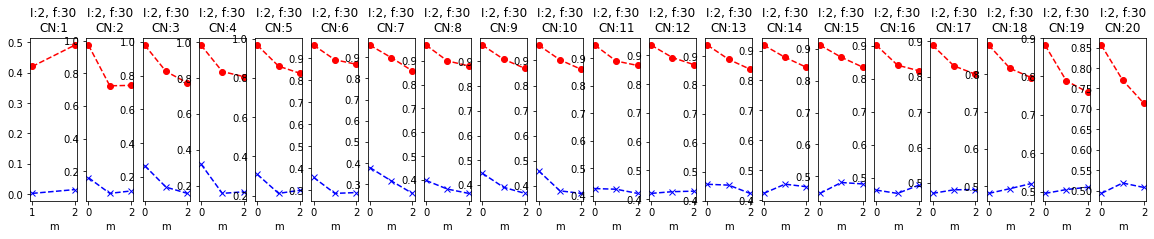

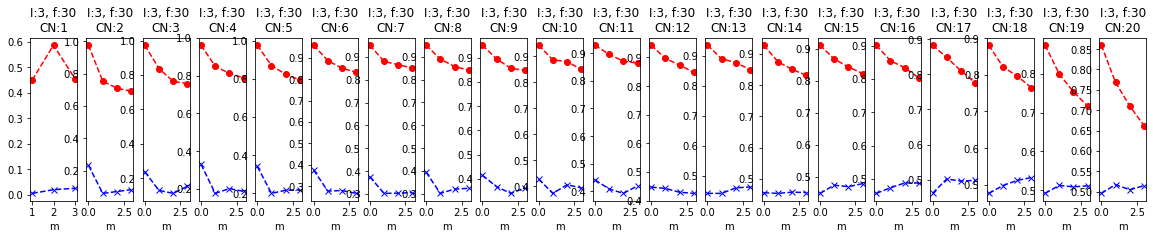

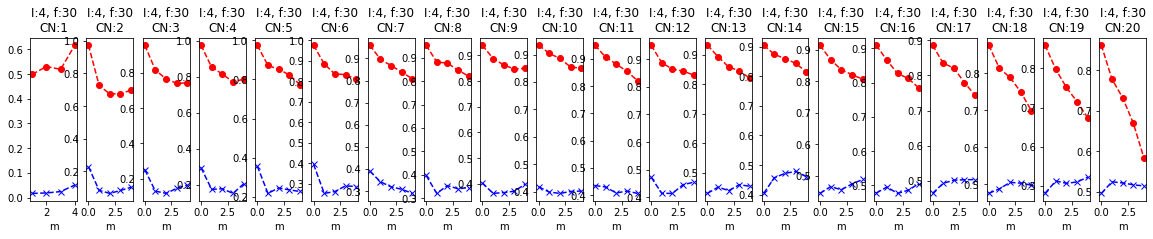

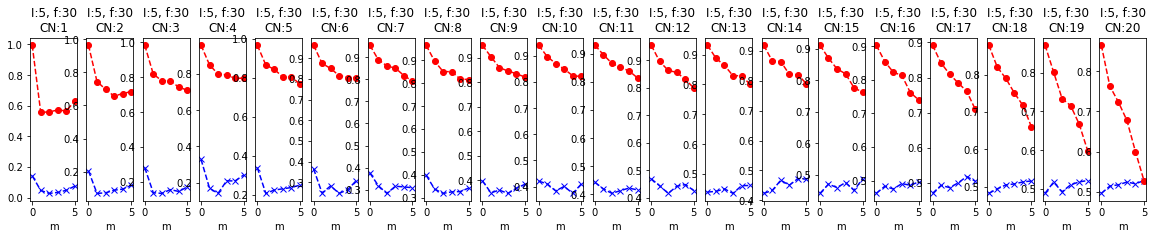

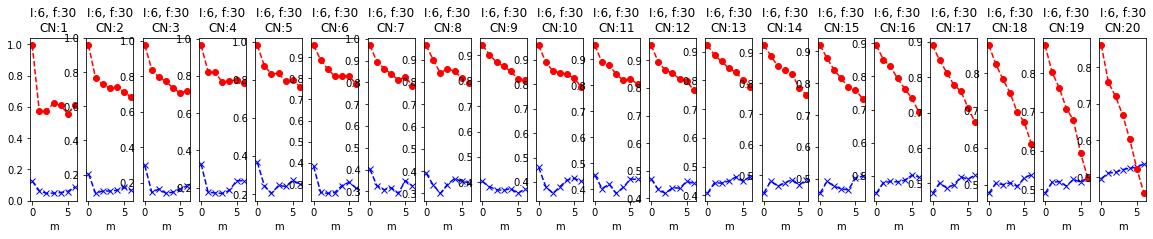

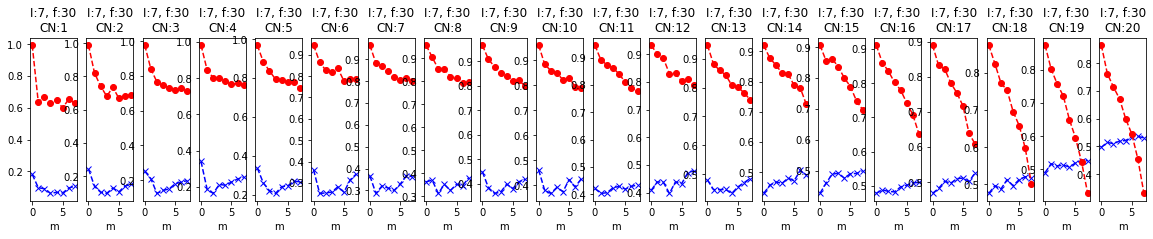

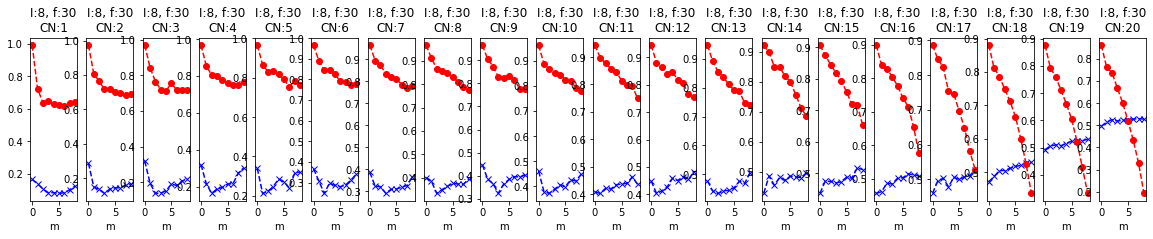

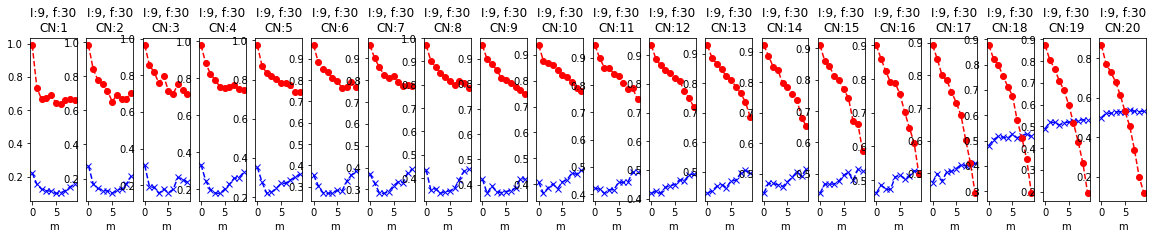

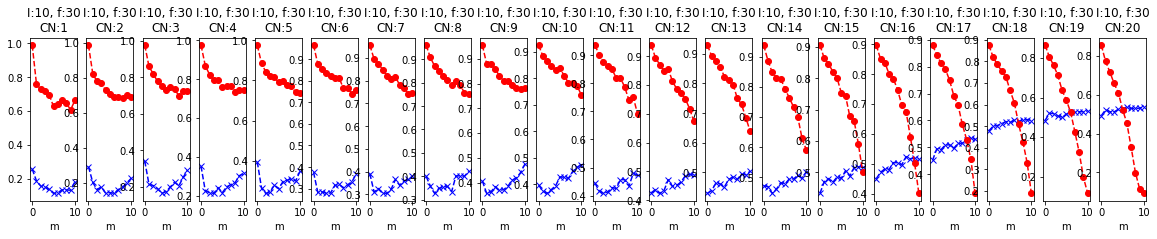

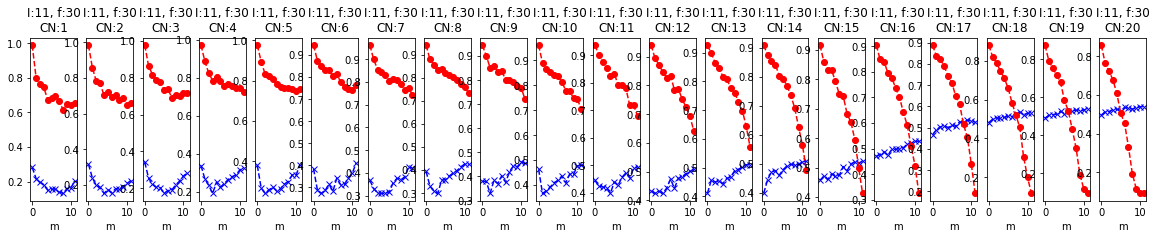

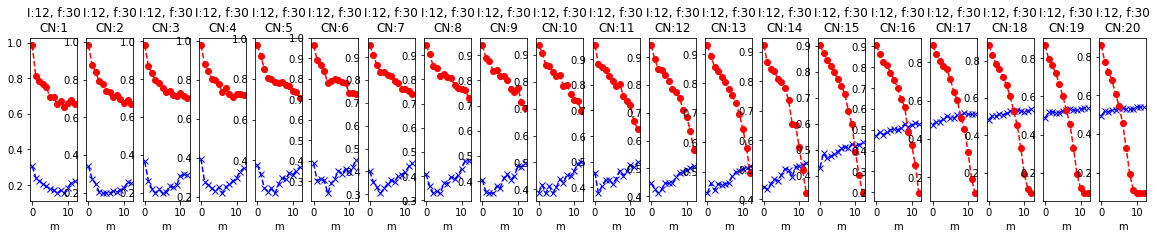

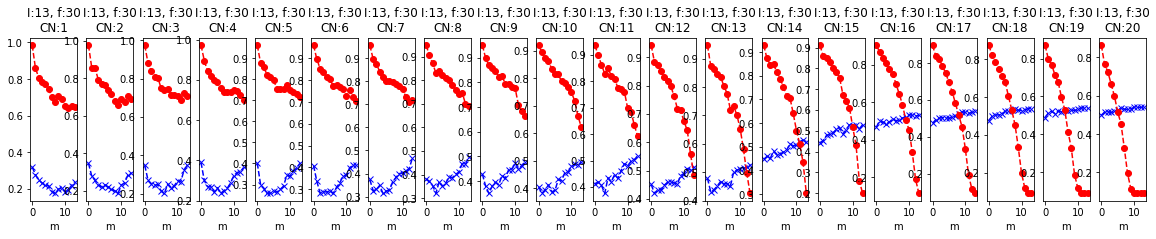

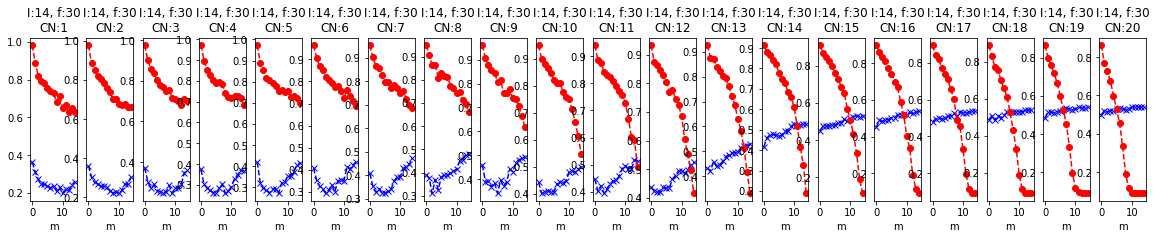

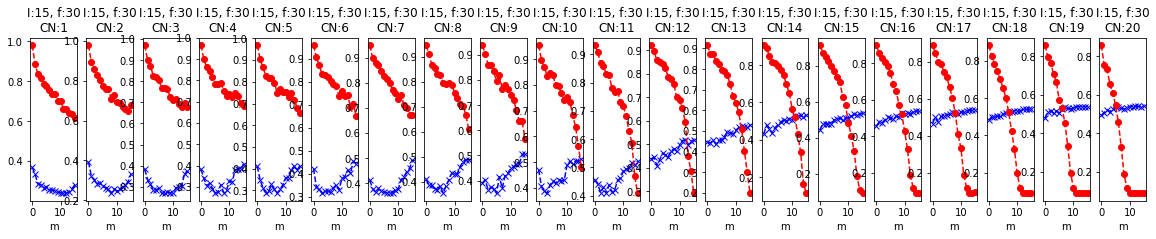

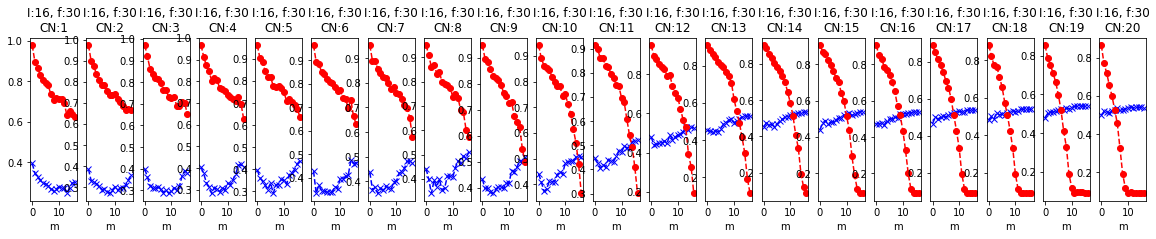

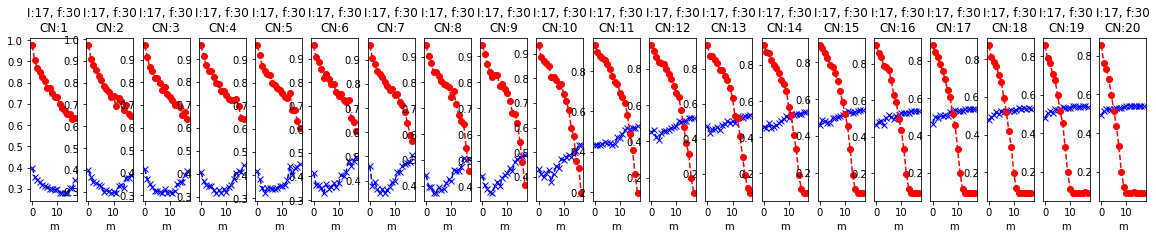

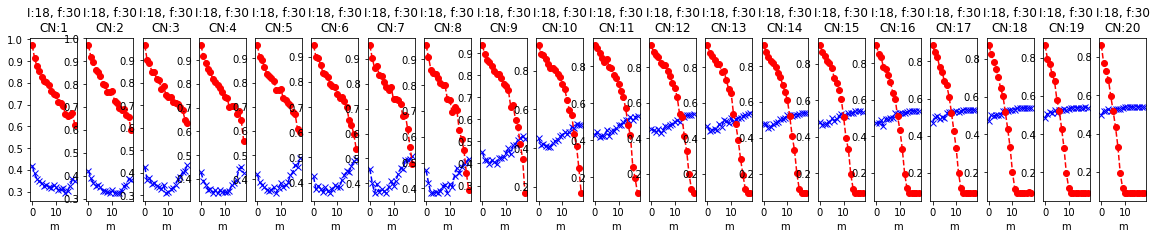

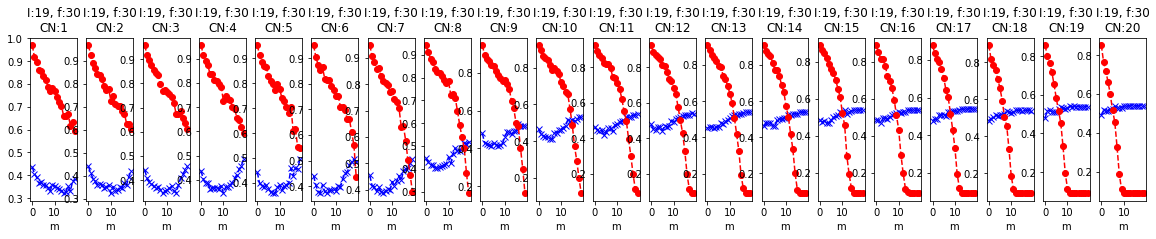

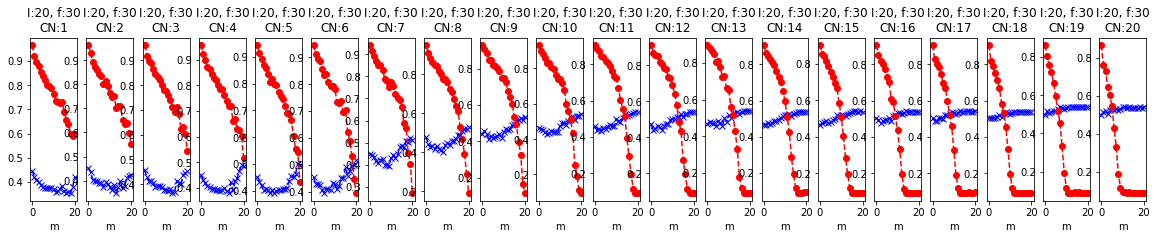

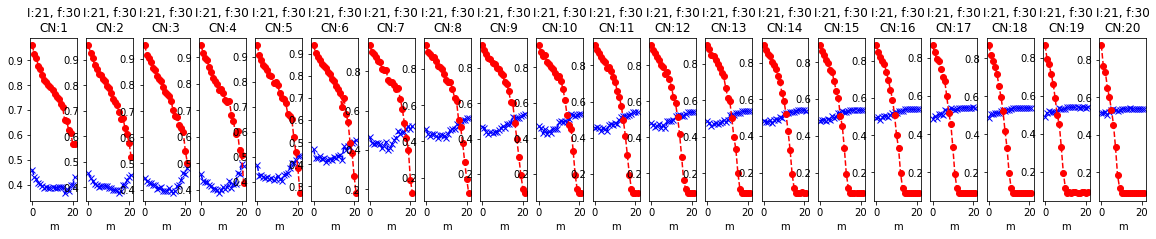

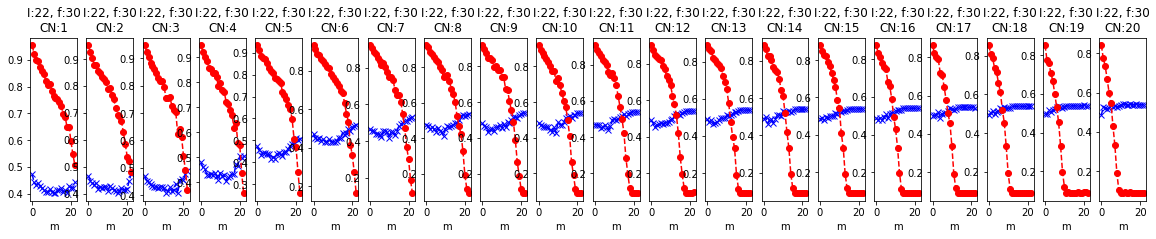

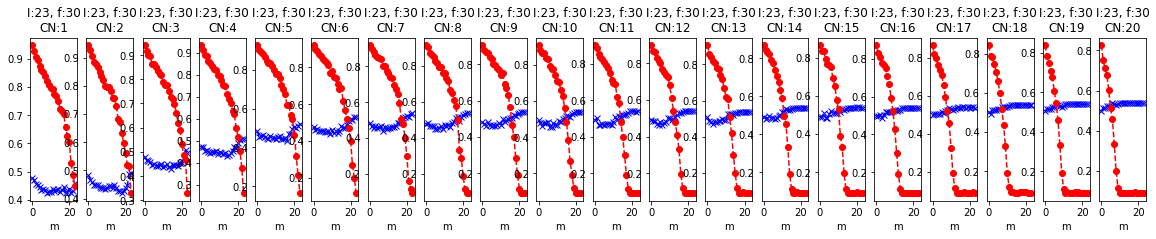

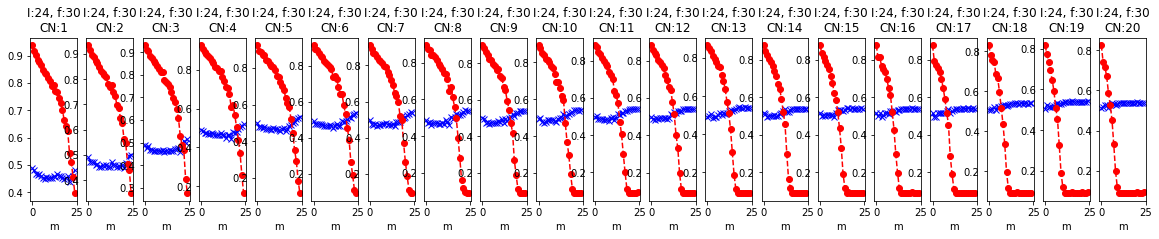

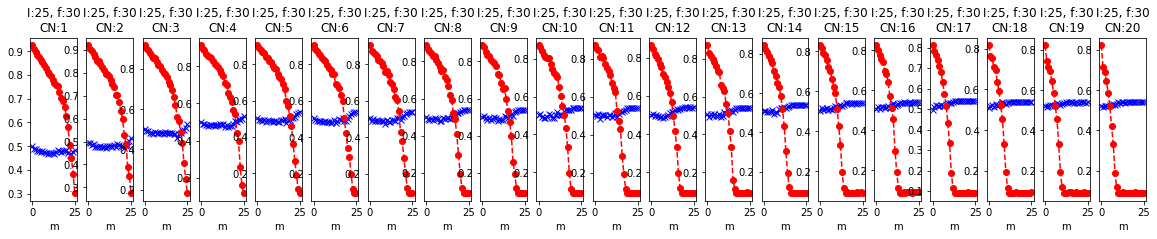

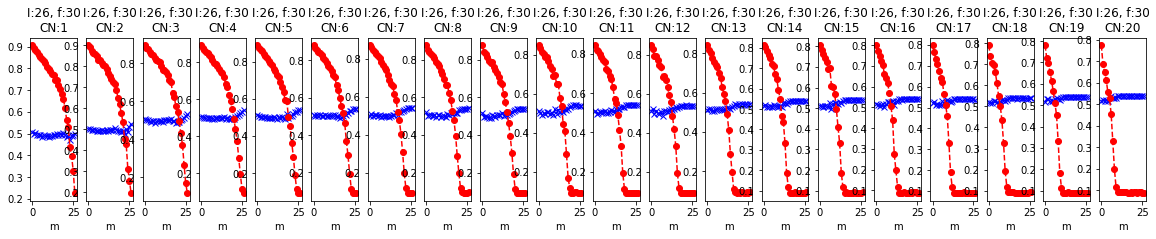

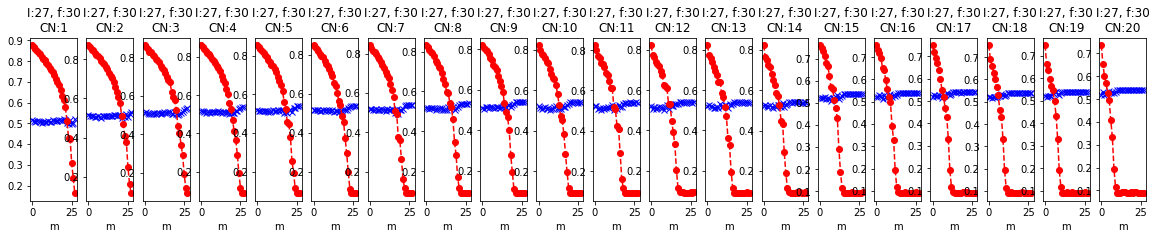

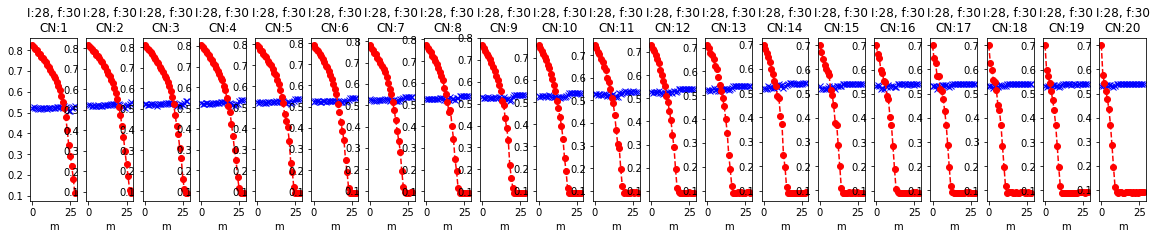

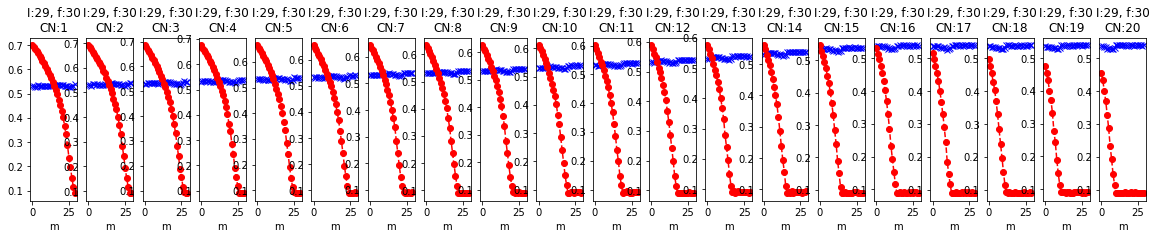

In [18]:
ploting_all_parameters(final=30, lmax=20, loops=100, CN=True, DIR=False)